# Faktor apakah yang menjual sebuah mobil?

# Pendahuluan
Kami adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.


# Tujuan
Proyek ini befokus pada Exploratory Data Analysis(EDA) dan Data Visualization. Analisis yang dilakukan yaitu menentukan hubungan antara harga sebuah mobil dengan usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Selanjutnya ditentukan faktor yang paling memengaruhi harga kendaraan. Data dianalisis menggunakan teknik statistik atau alat visualisasi untuk mengidentifikasi pola atau tren serta untuk mengungkap insights dalam data.

## 3.1 Pra-pemrosesan
### 3.1.1 Memuat Data
### 3.1.2 Mengeksplorasi Data Awal
      Deskripsi data, terdiri dari :
      a. price
      b. model_year
      c. model
      d. condition
      e. cylinders
      f. fuel — gas, disel, dan lain-lain.
      g. odometer — jarak tempuh kendaraan saat iklan ditayangkan
      h. transmission
      i. paint_color
      j. is_4wd — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)- date_posted — tanggal iklan ditayangkan-
         days_listed — jumlah hari iklan ditayangkan hingga dihapus
### 3.1.3 Kesimpulan & Langkah-langkah Selanjutnya
## 3.2 Mengatasi Nilai-nilai yang Hilang (Jika Ada)
## 3.3 Memperbaiki Tipe Data
## 3.4 Memperbaiki Kualitas Data
## 3.5 Memeriksa Data yang Sudah Bersih
## 3.6 Mempelajari Parameter Inti
## 3.7 Mempelajari dan Menangani Outlier
## 3.8 Mempelajari Parameter Inti Tanpa Outlier
## 3.9 Masa Berlaku Iklan
## 3.10 Harga Rata-rata Setiap Jenis Kendaraan
## 3.11 Faktor Harga
## 3.12 Kesimpulan Umum

## 3.1 Pra-pemrosesan

Library yang dibutuhkan

In [1]:
# Muat semua library
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

### Memuat Data

data Vehicles as df

In [4]:
# Muat file data menjadi DataFrame
try:
  df = pd.read_csv('/datasets/vehicles_us.csv')
except:
  df = pd.read_csv('/content/vehicles_us.csv')

### Mengeksplorasi Data Awal

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)- `date_posted` — tanggal iklan ditayangkan- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [5]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
# tampilkan sampel data
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
32050,19000,2013.0,jeep wrangler,excellent,6.0,gas,NaN,manual,offroad,orange,1.0,2018-08-23,22
21930,5000,2006.0,chevrolet silverado 1500,good,8.0,gas,191000.0,automatic,pickup,grey,1.0,2018-06-16,6
39388,16488,2016.0,honda cr-v,good,4.0,gas,36939.0,automatic,SUV,black,NaN,2018-08-30,12
36797,3995,2008.0,ford taurus,good,6.0,gas,122000.0,automatic,sedan,red,NaN,2019-04-19,4
7398,3400,2011.0,nissan versa,excellent,4.0,gas,176800.0,manual,hatchback,NaN,NaN,2018-07-12,66


Dalam data ada beberapa kolom yang memiliki nilai yang hilang dan memiliki type yang kurang tepat, misalnya : 'date_posted' yang seharusnya bertipe date dan 'is_4wd' menjadi boolean

In [8]:
df['is_4wd'].unique()

array([ 1., nan])

[Apakah ada kolom dengan tipe data yang tidak sesuai?]

In [9]:
df.duplicated().sum()

0

Tidak ada nilai duplikat dalam data

In [10]:
df_isna = df.isna().sum().sort_values(ascending=False).reset_index()
df_isna.columns = ['kolom', 'jumlah nilai hilang']
df_isna['percent'] = df_isna['jumlah nilai hilang'] * 100 / len(df['is_4wd'])
df_isna

,kolom,jumlah nilai hilang,percent
0,is_4wd,25953,50.369723
1,paint_color,9267,17.985444
2,odometer,7892,15.316836
3,cylinders,5260,10.208637
4,model_year,3619,7.023775
5,price,0,0.000000
6,model,0,0.000000
7,condition,0,0.000000
8,fuel,0,0.000000
9,transmission,0,0.000000


### Kesimpulan dan Langkah-Langkah Selanjutnya

dari data tersebut terdapat nilai yang hilang pada kolom sebagai berikut :
1. kolom 'is_4wd sebanyak 25953 atau 50% data
2. kolom 'paint_color' sebanyak 9267 atau 17% data
3. kolom 'odometer' sebanyak 7892 atau 15% data
4. kolom 'cylinders' sebanyak 5260 atau 10% data, dan
5. kolom 'model_year' sebanyak 3619 atau 7% data

Kesimpulan nya kita memerlukan pengecekan lebih detail terhadap data yang memiliki nilai yang hilang.setelah itu baru bisa mengisi nilai yang hilang atau menghapus nya. dimana kebanyakan nilai yang hilang terdapat di kolom Is_4wd dengan 50% data.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Melihat lebih dalam setiap kolom yang memiliki nilai yang hilang, diantaranya 'Kolom Model Year', 'Kolom Cylinders', 'Kolom Odometer', 'Kolom Paint Color', 'kolom is_4wd'

In [11]:
df['is_4wd'] = df['is_4wd'] >= 1

In [12]:
df['is_4wd'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51525, dtype: bool>

In [13]:
df['is_4wd'].unique()

array([ True, False])

In [14]:
df['is_4wd'] = df['is_4wd'] >=1
(df['is_4wd'].unique())

array([ True, False])

Output tersebut menunjukkan bahwa ada kendaraan yang memiliki penggerak 4 roda dan ada kendaraan yang tidak memiliki penggerak 4 roda.

In [15]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [16]:
df.groupby(['model', 'model_year'])['model_year'].count()

model              model_year
acura tl           1999.0         3
                   2001.0         6
                   2002.0         2
                   2003.0        10
                   2004.0        16
                                 ..
volkswagen passat  2014.0        44
                   2015.0        26
                   2016.0        10
                   2017.0        10
                   2018.0         1
Name: model_year, Length: 2226, dtype: int64

Pada kolom model dikarenakn distribusi nya yang beragam, nilai yang hilang akan kita isi tahun denga modus terbanyak terhadap model. dan kita akan membuat sebuah fungsi untuk mengisi itu.

In [17]:
def fill_missing (data, column, value_column):
    grouped_values = data.groupby(column)[value_column].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[column][i]
        value = grouped_values[value_column][i]
        data.loc[(data[column]==group) & (data[value_column].isna()),value_column] = value
    return data

In [18]:
df = fill_missing (df,'model', 'model_year')

In [19]:
df['model_year'].unique()

array([2011., 2013., 2003., 2017., 2014., 2015., 2012., 2008., 2018.,
       2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960., 1908.,
       1961., 1936., 1949., 1958., 1929.])

In [20]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [21]:
df.groupby(['model','cylinders'])['cylinders'].count()

model              cylinders
acura tl           4.0            3
                   6.0          208
bmw x5             6.0          200
                   8.0           51
buick enclave      4.0            1
                               ... 
volkswagen jetta   5.0          123
                   6.0            4
volkswagen passat  4.0          243
                   5.0           43
                   6.0           30
Name: cylinders, Length: 307, dtype: int64

Pada kolom cylinders dikarenakan distribusi nya yang beragam akan kita isi nilai yang hilang pada cylinders dengan modus terbanyak terhadap model.

In [22]:
df = fill_missing (df,'model','cylinders')

In [23]:
df['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [24]:
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [25]:
df.groupby(['model','paint_color'])['paint_color'].count()

model              paint_color
acura tl           black          44
                   blue            9
                   brown           2
                   custom          2
                   green           7
                                  ..
volkswagen passat  green           5
                   grey           38
                   red            17
                   silver         60
                   white          46
Name: paint_color, Length: 1019, dtype: int64

untuk nilai yang hilang pada color, akan kita isi dengan 'others'

In [26]:
df['paint_color'] = df['paint_color'].fillna('others')

In [27]:
df['paint_color'].unique()

array(['others', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [28]:
df['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

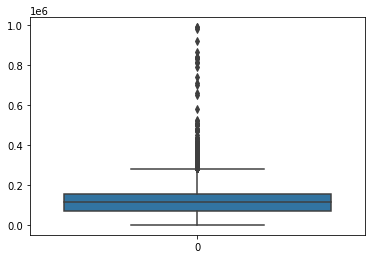

In [29]:
sns.boxplot(data=df['odometer'])
plt.show()

dari data di atas banyak sekali nilai outlier, yang mengharuskan kita mengisi nilai yang hilang dengan median.

In [30]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [31]:
df.loc[df['odometer'].isna(), 'odometer'] = df['odometer'].median()

Kesimpulan

setelah dilihat lebih dalam dan dianalisis, kolom yang memiliki nilai yang hilang di isi dengan beberapa metode sebagai berikut

1. Kolom Model Year = di isi dengan nilai terbanyak(modus) terhadap model mobil dikarenakan distribusi nya yang beragam
2. Kolom Cylinders = di isi dengan nilai terbanyak(modus) terhadap model mobil dikarenakan distribusi nya yang beragam
3. Kolom Odometer = di isi dengan nilai tengah(median) dikarenakan banyak nya outlier
4. Kolom Pain Color = di isi dengan Others untuk nilai yang hilang
5. Kolom is_4wd = di isi dengan nilai False(boolean) dikarenakan hanya ada 2 kategori, 1/True = 4wd, 0/False = non 4wd

## Memperbaiki Tipe Data

Memperbaiki semua tipe data yang di perlukan :
1. 'date_posted' menjadi datetime.
2. 'model_year', 'days_listed' & 'cylinders' menjadi integer.
3. 'is_4wd' menjadi boolean.
4. 'price' & 'odometer' menjadi integer.
5. 'model', 'condition', 'fuel', 'transmission', 'type', 'paint_color" menajdi string.

In [32]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format= '%Y-%m-%d')

In [33]:
df['model_year'] = df['model_year'].astype(int)

In [34]:
df['days_listed'] = df['days_listed'].astype(int)

In [35]:
df['cylinders'] = df['cylinders'].astype(int)

In [36]:
df['odometer'] = df['odometer'].astype(float)

In [37]:
df['price'] = df['price'].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

menambahkan kolom waktu secara terpisah antara hari, bulan & tahun

In [39]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
df['date_weekday'] = df['date_posted'].dt.weekday
df['date_month'] = df['date_posted'].dt.month
df['date_year'] = df['date_posted'].dt.year
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year
20376,6495.0,2015,ford explorer,good,6,gas,245000.0,automatic,SUV,blue,True,2019-03-21,27,3,3,2019


In [40]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_car'] = (df['date_year'] - df['model_year']).astype(int) + 1

In [41]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odo_year'] = round(df['odometer'] / df['age_car'], 0).astype(int)

In [42]:
#Mungkin membantu untuk mengganti nilai pada kolom 'condition'

def condition_change(value):
    if value == 'salvage':
        result = 0
    elif value == 'fair':
        result = 1
    elif value == 'good':
        result = 2
    elif value == 'excellent':
        result = 3
    elif value == 'like new':
        result = 4
    elif value == 'new':
        result = 5
    return result

df['condition'] = df['condition'].apply(condition_change).astype(int)
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year,age_car,avg_odo_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19,5,6,2018,8,18125
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,6,14784
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714


## Memeriksa Data yang Sudah Bersih

Data sudah siap untuk dianalisis. Sekarang kita coba cek sekali lagi. Sangat berguna untuk melihat apa sebenarnya yang akan kamu gunakan untuk analisis.

In [43]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  date_weekday  51525 non-null  int64         
 14  date_month    51525 non-null  int64         
 15  date_year     51525 non-null  int64 

In [44]:
# tampilkan sampel data 
df.sample(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year,age_car,avg_odo_year
18356,45900.0,2018,gmc sierra 1500,3,8,gas,35638.0,automatic,truck,white,True,2018-08-21,52,1,8,2018,1,35638
50308,4900.0,2013,kia soul,2,4,gas,85.0,manual,hatchback,red,False,2018-09-27,56,3,9,2018,6,14
27214,34995.0,2012,ram 2500,2,8,diesel,72610.0,automatic,truck,others,True,2018-12-19,9,2,12,2018,7,10373


## Mempelajari Parameter Inti 
- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

Saat ini merasa perlu mengulangi pekerjaan yang sama beberapa kali, dengan mencoba memikirkan instrumen pengodean apa yang bisa berguna untuk menghindari penduplikasian kode tersebut.

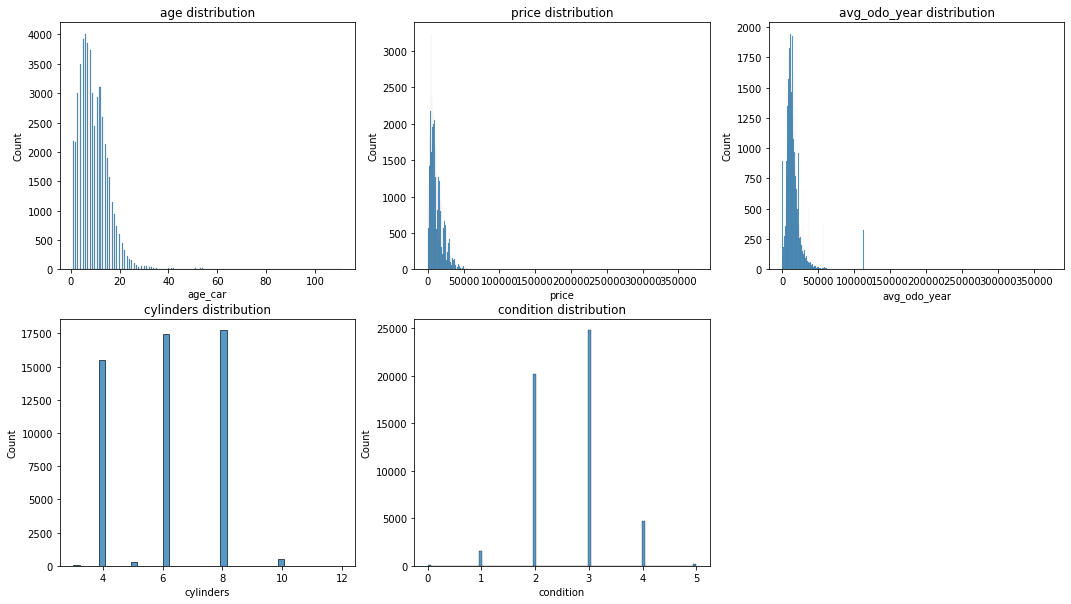

In [45]:
# fungsi membuat grafik distribusi
plt.figure(figsize=(18,10),frameon=True)
def grafik_distribution(data,title,no):
    plt.subplot(2, 3, no)
    plt.title(title)
    sns.histplot(data)
    
grafik_distribution(df['age_car'], 'age distribution',1)
grafik_distribution(df['price'], 'price distribution',2)
grafik_distribution(df['avg_odo_year'], 'avg_odo_year distribution',3)
grafik_distribution(df['cylinders'], 'cylinders distribution',4)
grafik_distribution(df['condition'], 'condition distribution',5)

plt.show()

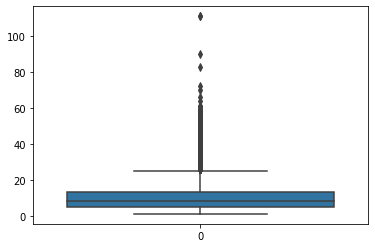

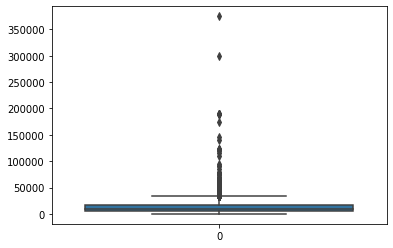

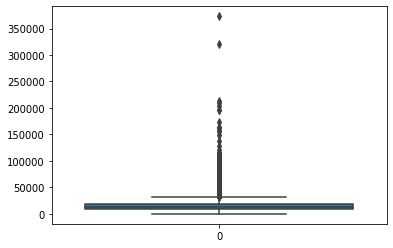

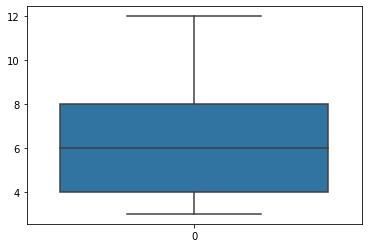

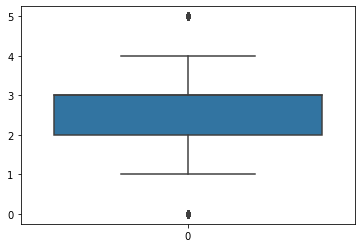

In [46]:
sns.boxplot(data=df['age_car'])
plt.show()
sns.boxplot(data=df['price'])
plt.show()
sns.boxplot(data=df['avg_odo_year'])
plt.show()
sns.boxplot(data=df['cylinders'])
plt.show()
sns.boxplot(data=df['condition'])
plt.show()

dari data di atas banyak sekali nilai outlier, yang mengharuskan kita mengisi nilai yang hilang dengan median.

In [47]:
df.loc[df['age_car'].isna(), 'age_car'] = df['age_car'].median()

In [48]:
df.loc[df['price'].isna(), 'price'] = df['price'].median()

In [49]:
df.loc[df['avg_odo_year'].isna(), 'avg_odo_year'] = df['avg_odo_year'].median()

In [50]:
df.loc[df['cylinders'].isna(), 'cylinders'] = df['cylinders'].median()

In [51]:
df.loc[df['condition'].isna(), 'condition'] = df['condition'].median()

## 6.19  Mempelajari dan Menangani Outlier

Berdasarkan hasil di atas, saatnya menentukan kolom apa yang mungkin berisi outlier dan buat sebuah DataFrame tanpa outlier tersebut. Petunjuk: Outlier bisa diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.

In [52]:
# Cell code 1
def upper_lower_whisker(series):
    Q1  = series.quantile(0.25)
    Q3  = series.quantile(0.75)

    IQR = Q3-Q1

    lower_whisker = Q1-(1.5*IQR)
    upper_whisker = Q3+(1.5*IQR)

    return lower_whisker, upper_whisker

In [53]:
# Cell code 2 
def outlier_cleansing(dataframe, column):

    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe

    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe


====== [START] outlier removal for age_car column ====== 

lower values : -7.0
upper values : 25.0


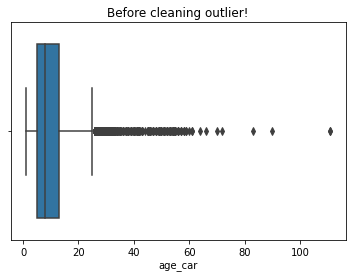

lower_check values : -7.0
upper_check values : 25.0


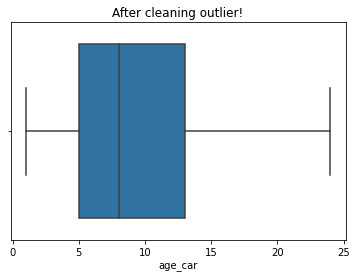


====== [FINISHED] outlier in [age_car] column has been clear! ====== 


====== [START] outlier removal for price column ====== 

lower values : -12850.0
upper values : 34750.0


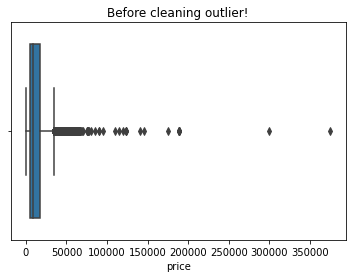

lower_check values : -11437.5
upper_check values : 32382.5


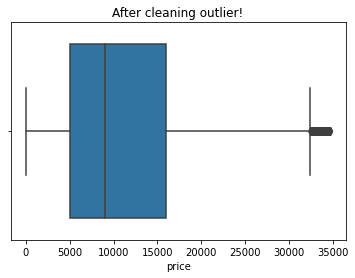


------ [RE-START] cleaning outlier in price column ------ 

lower values : -11437.5
upper values : 32382.5


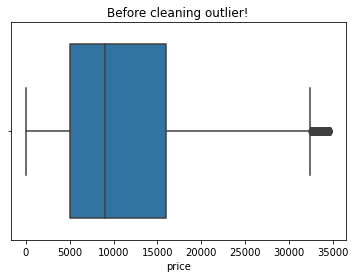

lower_check values : -10762.5
upper_check values : 31257.5


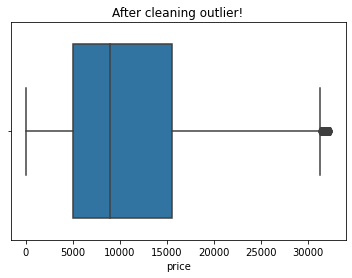


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10762.5
upper values : 31257.5


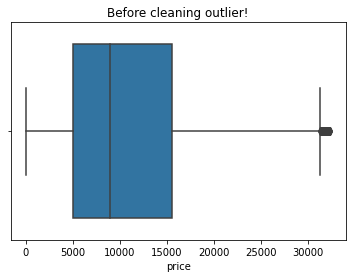

lower_check values : -10738.125
upper_check values : 31216.875


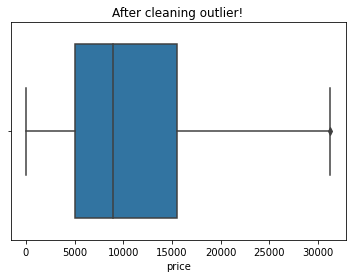


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10738.125
upper values : 31216.875


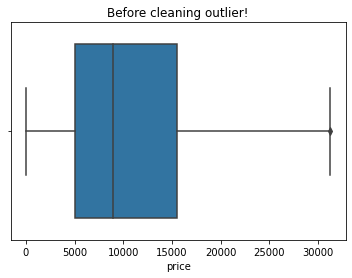

lower_check values : -10732.5
upper_check values : 31207.5


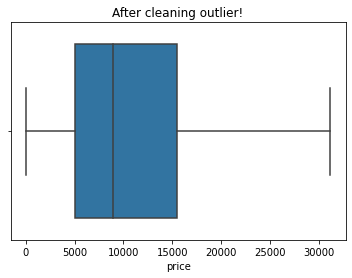


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10732.5
upper values : 31207.5


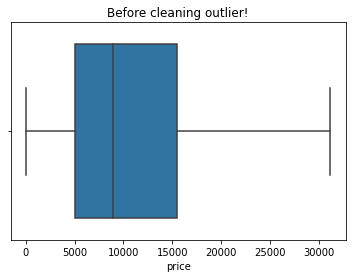

lower_check values : -10732.5
upper_check values : 31207.5


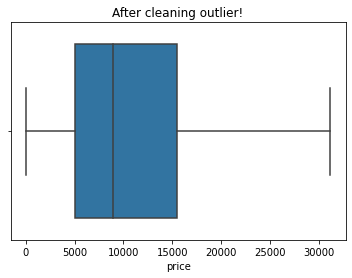


====== [FINISHED] outlier in [price] column has been clear! ====== 


====== [START] outlier removal for avg_odo_year column ====== 

lower values : -4222.0
upper values : 32362.0


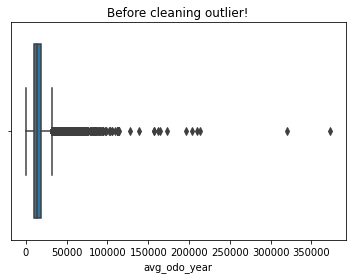

lower_check values : -2483.75
upper_check values : 29230.25


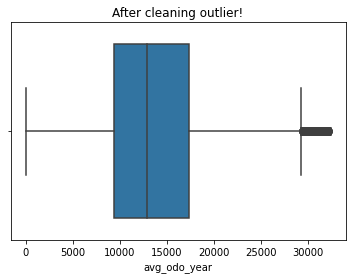


------ [RE-START] cleaning outlier in avg_odo_year column ------ 

lower values : -2483.75
upper values : 29230.25


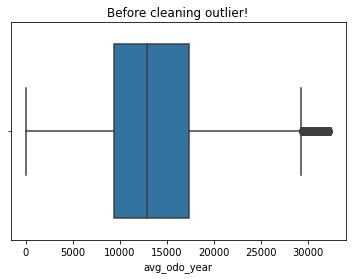

lower_check values : -2186.25
upper_check values : 28531.75


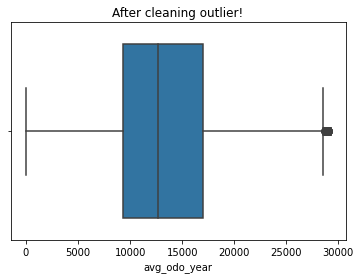


------ [RE-START] cleaning outlier in avg_odo_year column ------ 

lower values : -2186.25
upper values : 28531.75


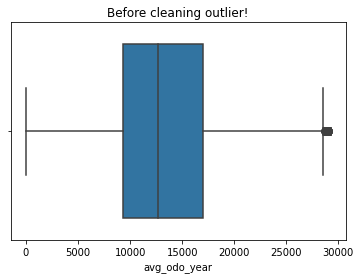

lower_check values : -2144.5
upper_check values : 28427.5


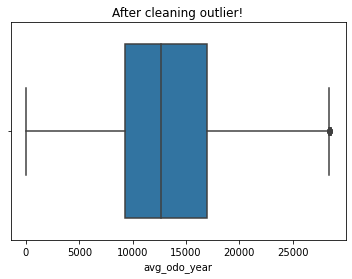


------ [RE-START] cleaning outlier in avg_odo_year column ------ 

lower values : -2144.5
upper values : 28427.5


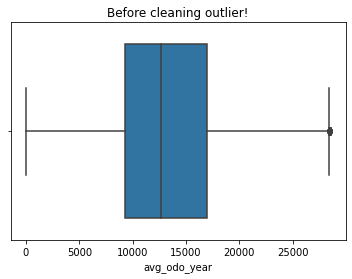

lower_check values : -2117.5
upper_check values : 28374.5


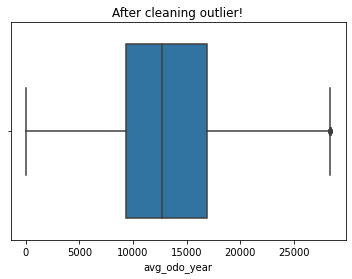


------ [RE-START] cleaning outlier in avg_odo_year column ------ 

lower values : -2117.5
upper values : 28374.5


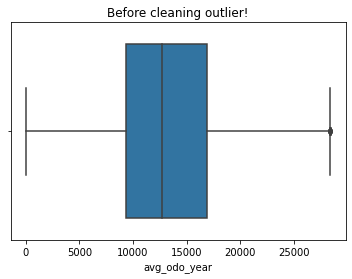

lower_check values : -2107.625
upper_check values : 28355.375


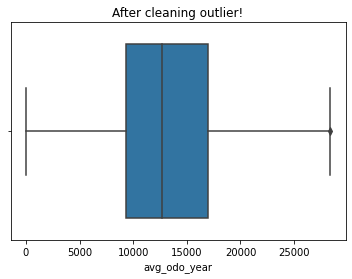


------ [RE-START] cleaning outlier in avg_odo_year column ------ 

lower values : -2107.625
upper values : 28355.375


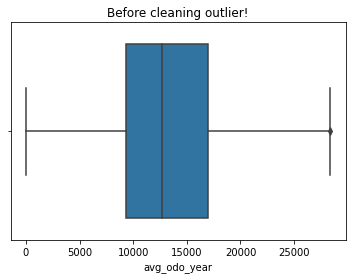

lower_check values : -2106.5
upper_check values : 28353.5


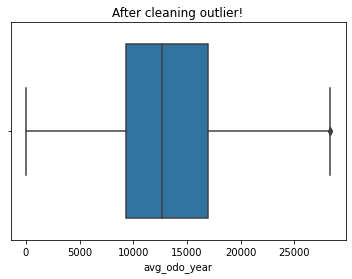


------ [RE-START] cleaning outlier in avg_odo_year column ------ 

lower values : -2106.5
upper values : 28353.5


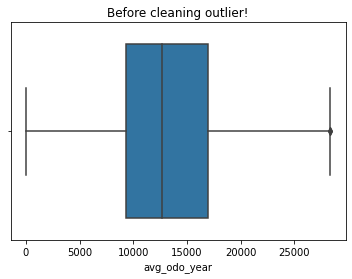

lower_check values : -2106.5
upper_check values : 28353.5


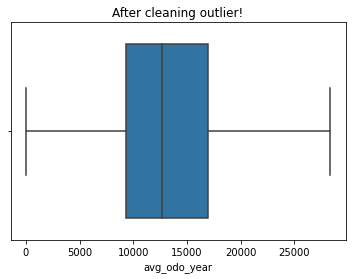


====== [FINISHED] outlier in [avg_odo_year] column has been clear! ====== 


====== [START] outlier removal for cylinders column ====== 

lower values : -2.0
upper values : 14.0


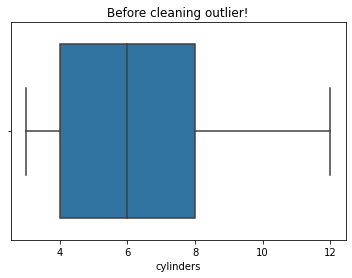

lower_check values : -2.0
upper_check values : 14.0


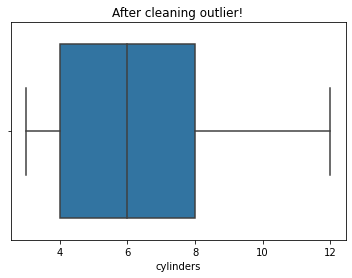


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 


====== [START] outlier removal for condition column ====== 

lower values : 0.5
upper values : 4.5


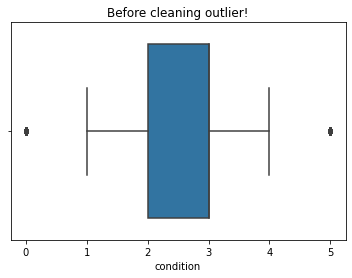

lower_check values : 0.5
upper_check values : 4.5


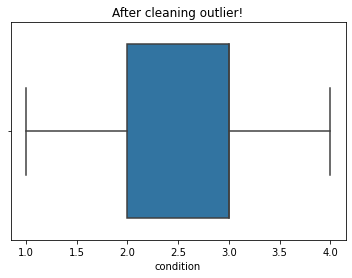


====== [FINISHED] outlier in [condition] column has been clear! ====== 



In [54]:
# Cell code 3

df_final = df.copy()
list_of_selected_column = ['age_car', 'price', 'avg_odo_year', 'cylinders', 'condition']

for column in list_of_selected_column:
    print(f'\n====== [START] outlier removal for {column} column ====== \n')
    df_final = outlier_cleansing(dataframe=df_final, column=column)

1. Kode Cell 1 berfungsi untuk menetukan Q1, Q3 & IQR.
2. Kode Cell 2 berfungsi untuk menghilangkan outlier satu kolom. dalam kode cell 2 ini ditampilkan boxplot sebelum dan sesudah outlier nya. Fungsi ini akan terus me restart apabila masih ada outlier.
3. Kode Cell 3 berfungsi untuk mengeksekusi fungsi kode cell 2 agar tidak menginput satu persatu kolom.

dari boxplot hasil kode cell 2 dapat disimpulkan kolom 'age_car', 'price', avg_odo_year' & 'cylinders' sudah tidak memiliki outlier.

## Masa Berlaku Iklan 
Menghitung rata-rata, median dari berapa hari iklan ditayangkan

mean: 40.0
median: 33.0
min: 0
max: 271


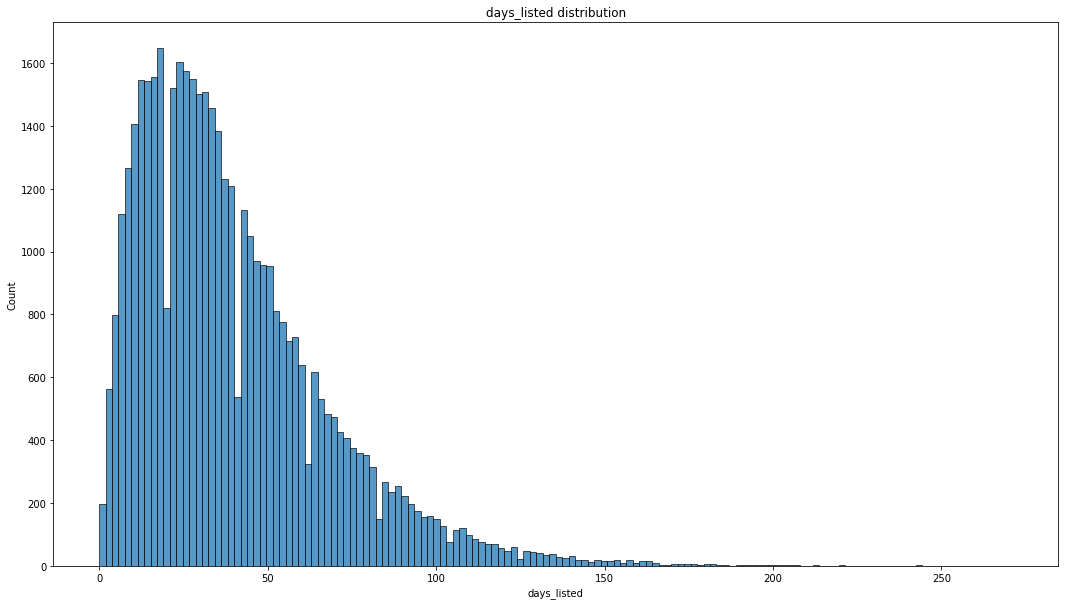

In [55]:
print('mean:', round(df_final['days_listed'].mean(), 0))
print('median:', df_final['days_listed'].median())
print('min:', df_final['days_listed'].min())
print('max:', df_final['days_listed'].max())
plt.figure(figsize=(18, 10),frameon=True)
plt.title('days_listed distribution')
sns.histplot(df_final['days_listed'])
plt.show()

Dari kesimpulan grafik Histogram days_listed adalah :

1. Mean dari distribusi data days listed adalah 40 hari sedangkan Mediannya adalah 33 hari.
2. Distribusinya miring ke kanan atau banyak mobil yang dijual di atas durasi mean nya.
3. Iklan tercepat adalah 0 hari dan iklan terlama adalah 271 hari

## Harga Rata-Rata Setiap Jenis Kendaraan

Menganalisia jumlah iklan dan harga rata rata untuk setiap jenis kendaraan dan buatlah grafik yang mendukung kendaraan dengan jumlah iklan yang paling banyak.

In [56]:
avg_group1 = df_final.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by = 'count_type', ascending=False).reset_index()

In [57]:
avg_group1

,type,avg_price,count_type
0,SUV,9888.891023,11140
1,sedan,6704.882608,11091
2,truck,14118.274915,10014
3,pickup,13812.984964,5653
4,coupe,12988.454068,1905
5,wagon,8750.174003,1454
6,mini-van,7518.419479,1037
7,hatchback,6621.295238,945
8,van,8046.030769,520
9,convertible,12844.723602,322


Text(0.5, 1.0, 'average price per type')

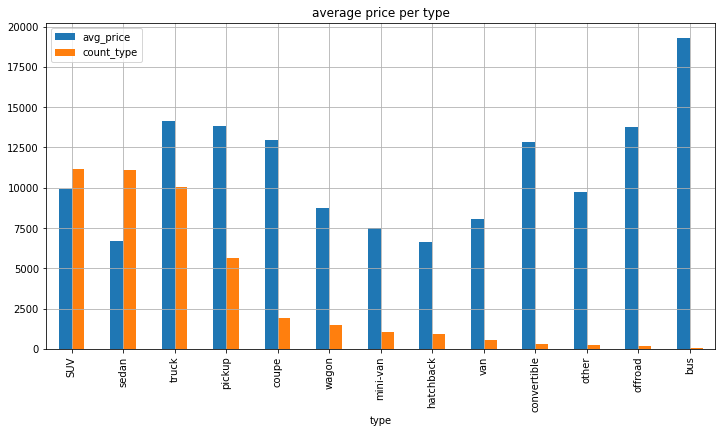

In [58]:
avg_group1.plot(kind='bar', grid=True, figsize=(12,6),x='type')
plt.title('average price per type')

Dari Grafik di atas dapat di simpulkan bahwa :

1. Kendaraan Sedan dan SUV paling banyak di iklan kan dengan rata rata haraga di bawah 12000
2. Kendaraan Bus sedikit di iklan kan dikarenakan harga rata rata yang di bawah 2500
3. 3 kendaraan populer adalah sedan dan SUV

## Faktor Harga

Faktor yang paling memengaruhi harga kendaraan

In [59]:
df_final_sedan = df_final[df_final['type'] == 'sedan']

In [60]:
df_final_sedan = df_final_sedan[df_final_sedan['paint_color'].map(df_final_sedan['paint_color'].value_counts()) > 50]
df_final_sedan = df_final_sedan[df_final_sedan['transmission'].map(df_final_sedan['transmission'].value_counts()) > 50]

In [61]:
df_final_sedan.corr()['price']

price           1.000000
model_year      0.619230
condition       0.294200
cylinders      -0.038042
odometer       -0.534459
is_4wd          0.058698
days_listed     0.000502
date_weekday   -0.004493
date_month     -0.040055
date_year       0.036884
age_car        -0.615609
avg_odo_year    0.113949
Name: price, dtype: float64

In [62]:
column = ['avg_odo_year','age_car', 'condition', 'price']
display(df_final_sedan[column].corr()[['price']].sort_values(by='price', ascending= False))

,price
price,1.000000
condition,0.294200
avg_odo_year,0.113949
age_car,-0.615609


In [63]:
#jumlah ads dan median harga kendaraan jenis sedan berdasarkan jenis transmisi
display(df_final_sedan.groupby('transmission').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
transmission,,
automatic,10372,5995.0
manual,550,4500.0
other,113,3995.0


In [64]:
#junlah ads dan median harga kendaraan jenios sedan berdasarkan jenis warna
display(df_final_sedan.groupby('paint_color').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
paint_color,,
black,1606,6500.0
white,1357,6499.0
grey,1474,5995.0
red,883,5995.0
others,1995,5910.0
silver,1878,5800.0
blue,1142,5500.0
custom,264,5347.5
brown,242,4496.5


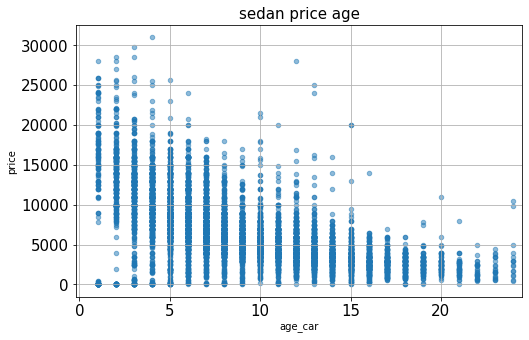

In [65]:
#plot harga sedan seiring bertambahnya usia
df_final_sedan.plot(x = 'age_car', y = 'price', kind = 'scatter',
                    figsize = (8, 5), grid = True, fontsize = 15, alpha = 0.5)

plt.title('sedan price age', fontsize = 15)
plt.xlim(-0.2, 24.5)
plt.show()

Text(0.5, 1.0, 'korelasi usia dengan harga mobil sedan')

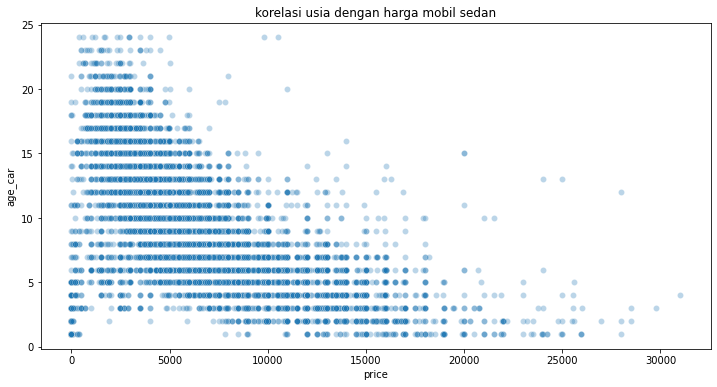

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final_sedan, x='price', y='age_car', alpha=0.3)
plt.title('korelasi usia dengan harga mobil sedan')

korelasi 'age_car' dengan price di dapat hasil -0.61, dimana semakin tua mobil harga akan semakin murah

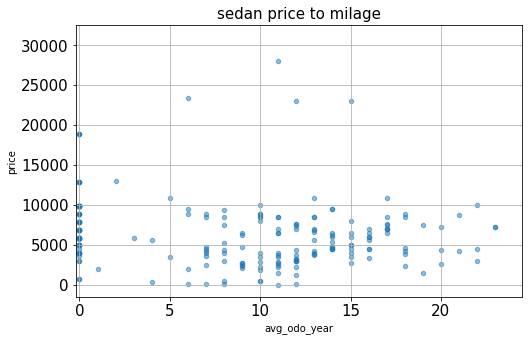

In [67]:
# plot harga sedan terhadap jarak tempuh
df_final_sedan.plot(x = 'avg_odo_year', y = 'price', kind = 'scatter',
                    figsize = (8, 5), grid = True, fontsize = 15, alpha = 0.5)

plt.title('sedan price to milage', fontsize = 15)
plt.xlim(-0.2, 24.5)
plt.show()

Text(0.5, 1.0, 'korelasi jarak tempuh dengan harga mobil sedan')

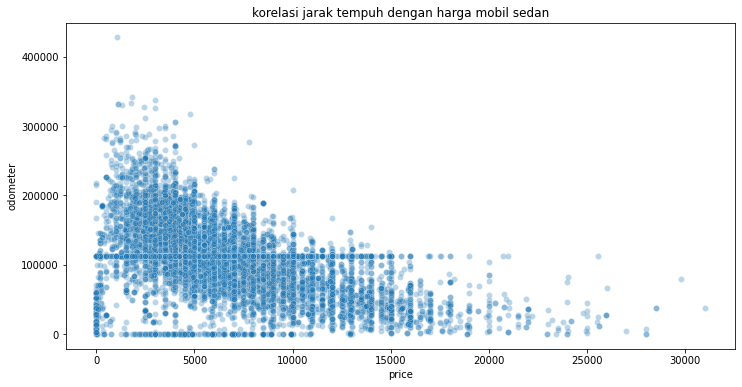

In [68]:
# korelasi jarak tempuh dan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final_sedan, x='price', y='odometer', alpha=0.3)
plt.title('korelasi jarak tempuh dengan harga mobil sedan')

korelasi 'odometer' dengan price hasilnya -0.53, artinya semakin tinggi penggunaan jarak tempuh mobil harga akan semakin murah

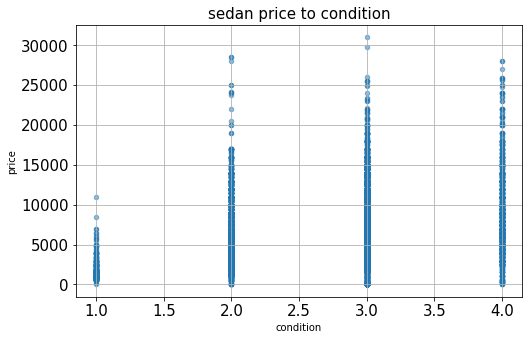

In [69]:
#plot harga sedan berdasarkan kondisi
df_final_sedan.plot(x = 'condition', y = 'price', kind = 'scatter',
                    figsize = (8, 5), grid = True, fontsize = 15, alpha = 0.5)

plt.title('sedan price to condition', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'korelasi condition_rating dengan harga mobil sedan')

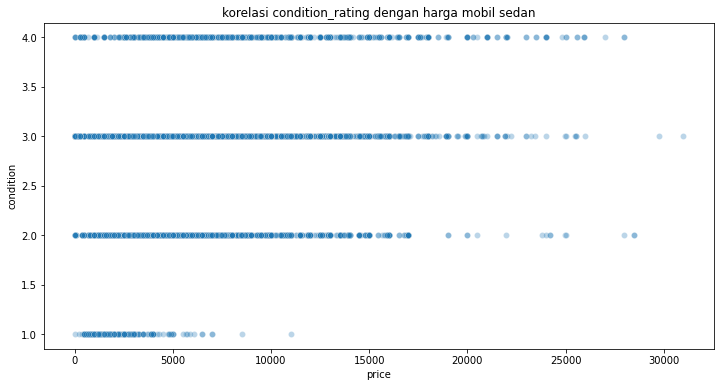

In [70]:
#korelasi rate_condition dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final_sedan, x= 'price', y='condition', alpha=0.3)
plt.title('korelasi condition_rating dengan harga mobil sedan')

korelasi 'condition' dengan price dapat hasil 0.29, artinya kondisi tersebut yaitu kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga.

In [71]:
#cek distribusi is_4wd untuk tipe sedan
df_final_sedan['transmission'].value_counts()

automatic    10372
manual         550
other          113
Name: transmission, dtype: int64

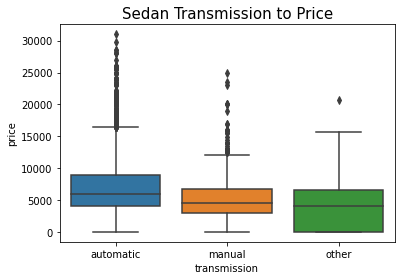

In [72]:
# plot harga sedan terhadap transmisi
sns.boxplot(x = 'transmission', y='price', data = df_final_sedan)
plt.title('Sedan Transmission to Price', fontsize=15)
plt.show()

Text(0.5, 1.0, 'korelasi transmisi dengan harga mobil sedan')

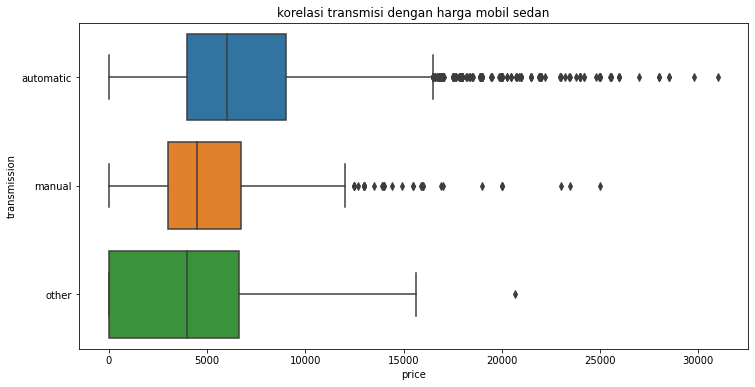

In [73]:
#korelasi transmission dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_final_sedan, x='price', y='transmission')
plt.title('korelasi transmisi dengan harga mobil sedan')

Korelasi 'transmission' dengan price di dapat hasil dimana transmisi suatu mobil mempengaruhi harga mobil, contoh transmisi automatic memiliki nilai harga yang lebih tinggi di banding tipe transmisi yang lain

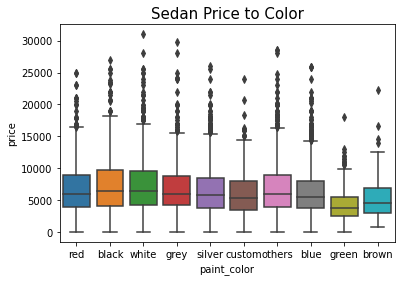

In [74]:
#plot harga sedan berdasarkan paint_color
sns.boxplot(x = 'paint_color', y='price', data = df_final_sedan)
plt.title('Sedan Price to Color', fontsize=15)
plt.show()

In [75]:
#cek distribusi color untuk tipe sedan
df_final_sedan['paint_color'].value_counts()

others    1995
silver    1878
black     1606
grey      1474
white     1357
blue      1142
red        883
custom     264
brown      242
green      194
Name: paint_color, dtype: int64

In [76]:
list_include_color_sedan = list(df_final_sedan['paint_color'].value_counts()[:-3].index)

In [77]:
df_final_sedan_color = df_final_sedan[df_final_sedan['paint_color'].isin(list_include_color_sedan)].reset_index(drop=True)

Text(0.5, 1.0, 'korelasi warna dengan harga')

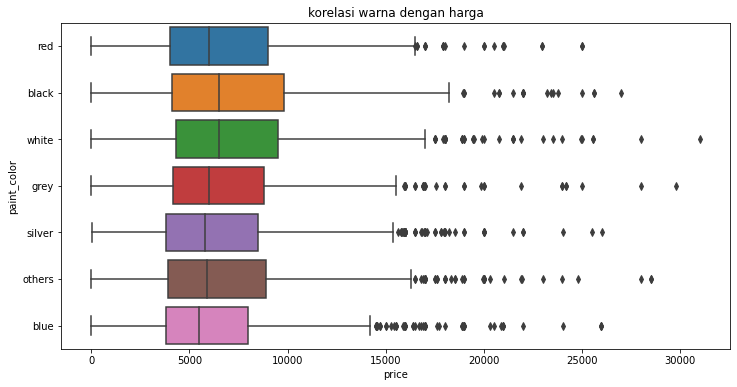

In [78]:
#korelasi warna dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_final_sedan_color, x='price', y='paint_color')
plt.title('korelasi warna dengan harga')

Korelasi 'color' dengan price di dapat hasil dimana warna suatu mobil tidak terlalu mempengaruhi harga mobil, dikarenakan sebaran 'color' dengan price yang hampir sama semua di setiap warna

In [79]:
#SUV
df_final_suv = df_final[df_final['type'] == 'SUV']

In [80]:
#filter dataframe suv
df_final_suv = df_final_suv[df_final_suv['paint_color'].map(df_final_suv['paint_color'].value_counts()) > 50]
df_final_suv = df_final_suv[df_final_suv['transmission'].map(df_final_suv['transmission'].value_counts()) > 50]

In [81]:
df_final_suv.corr()['price']

price           1.000000
model_year      0.573302
condition       0.262091
cylinders      -0.017017
odometer       -0.474210
is_4wd          0.120023
days_listed    -0.017422
date_weekday    0.015562
date_month     -0.015753
date_year       0.012433
age_car        -0.571318
avg_odo_year    0.187827
Name: price, dtype: float64

In [82]:
#korelasi antara kolom tetentu terhadap harga kendaraan jenis suv
column = ['avg_odo_year','age_car', 'condition', 'price']
display(df_final_suv[column].corr()[['price']].sort_values(by='price', ascending= False))

,price
price,1.000000
condition,0.262091
avg_odo_year,0.187827
age_car,-0.571318


In [83]:
#jumlah ads dan median harga kendaraan jenis SUV berdasarkan jenis transmisi
display(df_final_suv.groupby('transmission').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
transmission,,
manual,445,10995.0
automatic,10469,7999.0
other,146,6699.5


In [84]:
#junlah ads dan median harga kendaraan jenios SUV berdasarkan jenis warna
display(df_final_suv.groupby('paint_color').agg({'model': 'count', 'price': 'median'})
        .rename(columns = ({'model': 'ads', 'price': 'median_price'}))
        .sort_values(by='median_price', ascending = False)
        .query('ads > 50'))

,ads,median_price
paint_color,,
orange,75,16900.0
black,1941,9995.0
white,1715,8995.0
others,1998,8000.0
grey,1057,7999.0
silver,1432,7995.0
custom,283,7900.0
red,840,7499.5
brown,350,6999.5


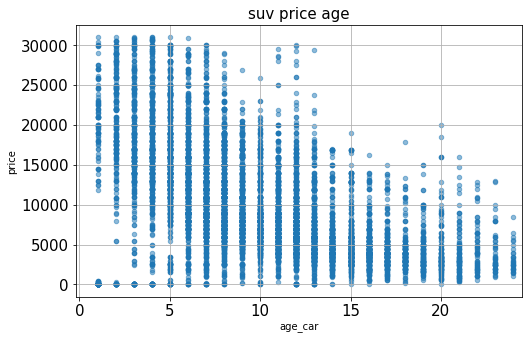

In [85]:
#plot harga SUV seiring bertambahnya usia
df_final_suv.plot(x = 'age_car', y = 'price', kind = 'scatter',
                    figsize = (8, 5), grid = True, fontsize = 15, alpha = 0.5)

plt.title('suv price age', fontsize = 15)
plt.xlim(-0.2, 24.5)
plt.show()

Text(0.5, 1.0, 'korelasi usia dengan harga mobil SUV')

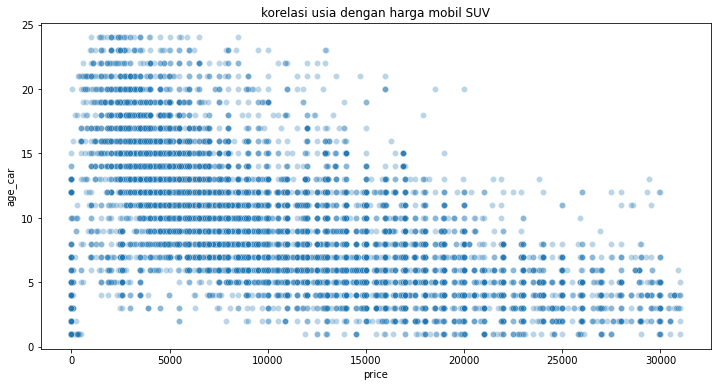

In [86]:
#korelasi usia dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final_suv, x='price', y='age_car', alpha=0.3)
plt.title('korelasi usia dengan harga mobil SUV')

Korelasi 'age_car' dengan price di dapat hasil -0.57, dimana semakin tua mobil harga semakin murah.

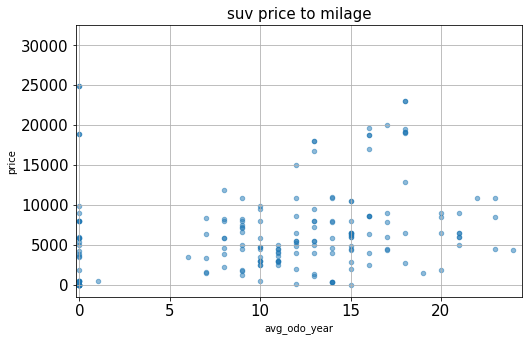

In [87]:
# plot harga suv terhadap jarak tempuh
df_final_suv.plot(x = 'avg_odo_year', y = 'price', kind = 'scatter',
                    figsize = (8, 5), grid = True, fontsize = 15, alpha = 0.5)

plt.title('suv price to milage', fontsize = 15)
plt.xlim(-0.2, 24.5)
plt.show()

Text(0.5, 1.0, 'korelasi jarak tempuh dengan harga mobil SUV')

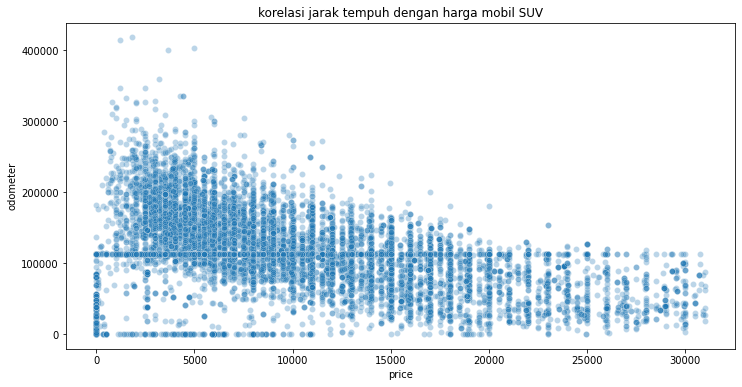

In [88]:
#korelasi jarak tempuh dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final_suv, x='price', y='odometer', alpha=0.3)
plt.title('korelasi jarak tempuh dengan harga mobil SUV')

Korelasi 'odometer' dengan price di dapat hasil -0.47, dimana semakin tinggi jarak tempuh mobil harga akan semakin murah.

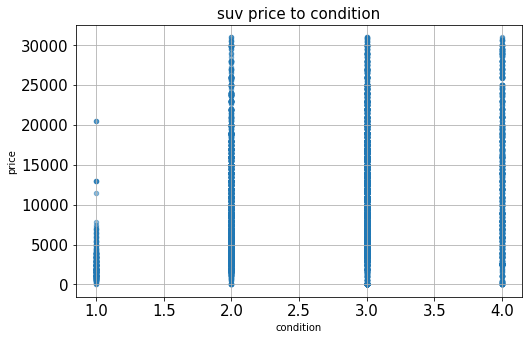

In [89]:
#plot harga suv berdasarkan kondisi
df_final_suv.plot(x = 'condition', y = 'price', kind = 'scatter',
                    figsize = (8, 5), grid = True, fontsize = 15, alpha = 0.5)

plt.title('suv price to condition', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'korelasi condition_rating dengan harga mobil SUV')

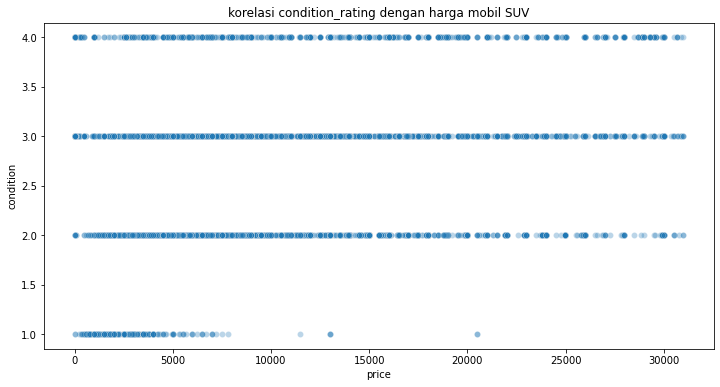

In [90]:
#korelasi rate_condition dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final_suv, x='price', y='condition', alpha=0.3)
plt.title('korelasi condition_rating dengan harga mobil SUV')

Korelasi 'condition' dengan price di dapat hasil 0.26, dimana kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga

In [91]:
#cek distribusi is_4wd untuk tipe SUV
df_final_suv['transmission'].value_counts()

automatic    10469
manual         445
other          146
Name: transmission, dtype: int64

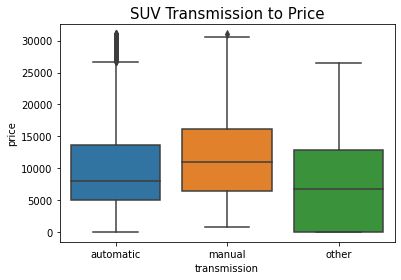

In [92]:
# plot harga suv terhadap transmisi
sns.boxplot(x = 'transmission', y='price', data = df_final_suv)
plt.title('SUV Transmission to Price', fontsize=15)
plt.show()

Text(0.5, 1.0, 'korelasi transmisi dengan harga mobil SUV')

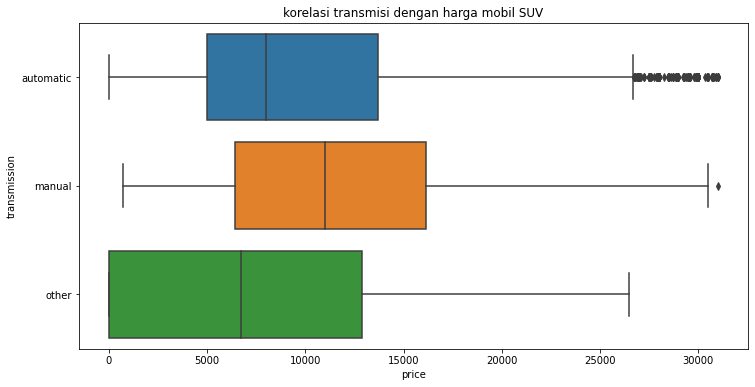

In [93]:
#korelasi transmission dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_final_suv, x='price', y='transmission')
plt.title('korelasi transmisi dengan harga mobil SUV')

Korelasi 'transmission' dengan price di dapat hasil dimana transmisi suatu mobil mempengaruhi harga mobil, contoh transmisi manual memiliki nilai harga rata rata yang lebih tinggi di banding tipe transmisi yang lain

In [94]:
#cek distribusi color untuk tipe SUV
df_final_suv['paint_color'].value_counts()

others    1998
black     1941
white     1715
silver    1432
grey      1057
blue       956
red        840
green      413
brown      350
custom     283
orange      75
Name: paint_color, dtype: int64

In [95]:
list_include_color_suv = list(df_final_suv['paint_color'].value_counts()[:-2].index)

In [96]:
df_final_suv_color = df_final_suv[df_final_suv['paint_color'].isin(list_include_color_suv)].reset_index(drop=True)

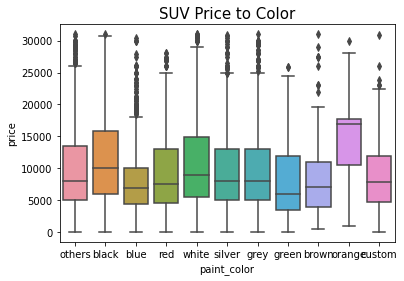

In [97]:
#plot harga suv berdasarkan paint_color
sns.boxplot(x = 'paint_color', y='price', data = df_final_suv)
plt.title('SUV Price to Color', fontsize=15)
plt.show()

Text(0.5, 1.0, 'korelasi warna dengan harga mobil SUV')

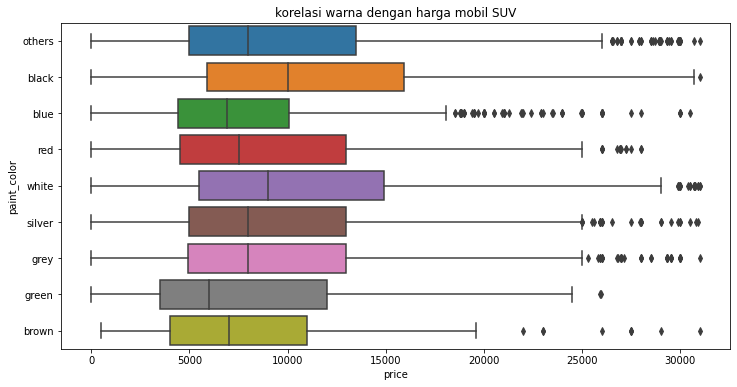

In [98]:
#korelasi warna dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_final_suv_color, x='price', y='paint_color')
plt.title('korelasi warna dengan harga mobil SUV')

Korelasi 'color' dengan price di dapat hasil dimana warna suatu mobil tidak terlalu mempengaruhi harga mobil, dikarenakan sebaran warna dengan harga yang hampir sama semua di setiap warna

Kesimpulan sementara perbandingan antara analisi dua tipe kendaraan yaitu jenis sedan dan SUV adalah sebagai berikut :

korelasi 'age_car' dengan price di dapat hasil -0.61, dimana semakin tua mobil harga akan semakin murah
korelasi 'odometer' dengan price hasilnya -0.53, artinya semakin tinggi penggunaan jarak tempuh mobil harga akan semakin murah
korelasi 'condition' dengan price dapat hasil 0.29, artinya kondisi tersebut yaitu kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga.
Korelasi 'transmission' dengan price di dapat hasil dimana transmisi suatu mobil mempengaruhi harga mobil, contoh transmisi automatic memiliki nilai harga yang lebih tinggi di banding tipe transmisi yang lain.
Korelasi 'color' dengan price di dapat hasil dimana warna suatu mobil tidak terlalu mempengaruhi harga mobil, dikarenakan sebaran 'color' dengan price yang hampir sama semua di setiap warna

Korelasi 'age_car' dengan price di dapat hasil -0.57, dimana semakin tua mobil harga semakin murah
Korelasi 'odometer' dengan price di dapat hasil -0.47, dimana semakin tinggi jarak tempuh mobil harga akan semakin murah
Korelasi 'condition' dengan price di dapat hasil 0.26, dimana kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga
Korelasi 'transmission' dengan price di dapat hasil dimana transmisi suatu mobil mempengaruhi harga mobil, contoh transmisi manual memiliki nilai harga rata rata yang lebih tinggi di banding tipe transmisi yang lain
Korelasi 'color' dengan price di dapat hasil dimana warna suatu mobil tidak terlalu mempengaruhi harga mobil, dikarenakan sebaran warna dengan harga yang hampir sama semua di setiap warna


1. Korelasi 'age_car' dengan price, dimana semakin tua mobil harga akan semakin murah baik itu jenis sedan maupun SUV.
2. Korelasi 'odometer' dengan price, dimana semakin tinggi penggunaan jarak tempuh mobil harga akan semakin murah baik itu jenis sedan maupun SUV.
3. Korelasi 'condition' dengan price, dimana kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga baik itu jenis sedan maupun SUV.
4. Korelasi 'transmission'dengan price didapat hasil yang berbeda yaitu untuk kendaraan jenis sedan transmisi automatic memiliki nilai harga lebih tinggi, namun sebaliknya untuk kendaraan jenis SUV transmisi manual memiliki nilai harga rata-rata lebih tinggi.
5. Korelasi 'color' dengan price didapat hasil yang tidak terlalu mempengaruhi harga, karena sebaran warna dengan harga hampir sama semua baik itu jenis kendaraan sedan maupun SUV.

## Kesimpulan Umum


1. Nilai yang hilang pada data awal kita isi dengan beberapa ketentuan, seperti memasukan modus/nilai terbanyak terhadap model seperti pada kolom Cylinders dan model_year, kolom Paint_color di isi dengan nilai Others, kolom odometer diisi dengan nilai tengah/median , dan ada juga yang di isi dengan nilai 0 untuk kolom is_4wd dikarenakan hanya ada 2 kemungkinan 1 = 4wd, 0 = tidak 4wd dan dirubah menjadi tipe boolean.
2. Beberapa kolom memiliki tipe data yang salah, jadi kita perbaiki sesuai dengan yang dibutuhkan, contoh kolom tanggal, dirubah tipenya menjadi datetime.
3. Membuat kolom baru tentang rata rata jarak tempuh pertahun dan membuat kolom condition menjadi numerik.
4. Membuat histogram dari data asli dan histogram dari data yang sudah di filter(menghapus nilai outlier) pada kolom 'avg_odo_year', 'age_car', 'condition' dan 'price' yang membuat sebuah perbadaan grafik yang di tampilkan, dimana grafik dari data yang sudah di filter lebih jelas.
5. Membuat histogram tentang rata rata dan median dari days_listed. yang mendapatkan kesimpulan bahwa rata rata sebuah mobil akan terjual di hari ke 40.
6. Membuat korelasi antara jumlah iklan dan harga rata rata setiap jenis kendaraan yang dimana di dapat kendaraan yang paling populer di iklan kan adalah Sedan dan SUV dikarenakan harga rata rata dibawah 12000
7. Membuat korelasi dari dua mobil terpopuler dengan 5 indikator, didapat hasil berikut :
a. Sedan = harga akan tinggi jika semakin muda usia mobil, jarak tempuh masih sedikit, kondisi like new/excellent, dan bertransmisi automatic.
b. SUV = harga akan tinggi jika semakin muda usia mobil, jarak tempuh masih sedikit, kondisi like new/excellent, dan transmisi manual.